<a href="https://colab.research.google.com/github/manushukla2/mlproject/blob/main/skincancer_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image





In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical


In [ ]:
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [ ]:
import os
import pandas as pd

train_dir = '/content/drive/MyDrive/Train'
test_dir = '/content/drive/MyDrive/Test'

train_df = pd.DataFrame(columns=['image_path', 'label'])
test_df = pd.DataFrame(columns=['image_path', 'label'])

for label, directory in enumerate(os.listdir(train_dir)):
    for filename in os.listdir(os.path.join(train_dir, directory)):
        image_path = os.path.join(train_dir, directory, filename)
        train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)

for label, directory in enumerate(os.listdir(test_dir)):
    for filename in os.listdir(os.path.join(test_dir, directory)):
        image_path = os.path.join(test_dir, directory, filename)
        test_df = test_df.append({'image_path': image_path, 'label': label}, ignore_index=True)


df = pd.concat([train_df, test_df], ignore_index=True)
del test_df,train_df
df

<ipython-input-7-9cdf05248044>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
<ipython-input-7-9cdf05248044>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
<ipython-input-7-9cdf05248044>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
<ipython-input-7-9cdf05248044>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'image_path': image_pa

image_path label
0     /content/drive/MyDrive/Train/seborrheic kerato...     0
1     /content/drive/MyDrive/Train/seborrheic kerato...     0
2     /content/drive/MyDrive/Train/seborrheic kerato...     0
3     /content/drive/MyDrive/Train/seborrheic kerato...     0
4     /content/drive/MyDrive/Train/seborrheic kerato...     0
...                                                 ...   ...
2352  /content/drive/MyDrive/Test/basal cell carcino...     8
2353  /content/drive/MyDrive/Test/basal cell carcino...     8
2354  /content/drive/MyDrive/Test/basal cell carcino...     8
2355  /content/drive/MyDrive/Test/basal cell carcino...     8
2356  /content/drive/MyDrive/Test/basal cell carcino...     8

[2357 rows x 2 columns]

In [ ]:
labels = os.listdir(train_dir)


label_map = {i: label for i, label in enumerate(labels)}
num_classes=len(label_map)
label_map

{0: 'seborrheic keratosis',
 1: 'pigmented benign keratosis',
 2: 'basal cell carcinoma',
 3: 'squamous cell carcinoma',
 4: 'actinic keratosis',
 5: 'nevus',
 6: 'vascular lesion',
 7: 'melanoma',
 8: 'dermatofibroma'}

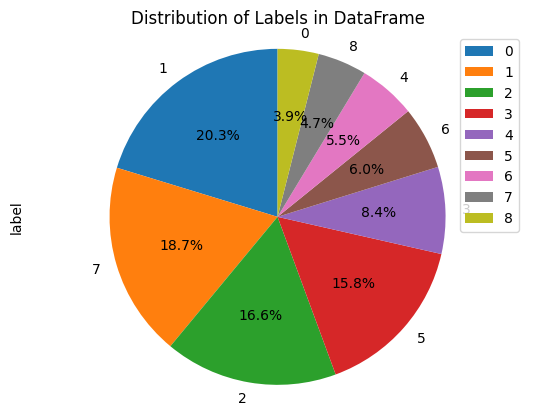

In [ ]:
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Labels in DataFrame')
plt.legend(df['label'].unique())
plt.show()

In [ ]:
class_counts = df['label'].value_counts().sort_index()


print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in label_map.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
0               seborrheic keratosis           93        
1               pigmented benign keratosis     478       
2               basal cell carcinoma           392       
3               squamous cell carcinoma        197       
4               actinic keratosis              130       
5               nevus                          373       
6               vascular lesion                142       
7               melanoma                       441       
8               dermatofibroma                 111       
------------------------------------------------------------
Total                                         2357      


In [ ]:
max_images_per_class = 2500

df = df.groupby("label").apply(lambda x: x.head(max_images_per_class)).reset_index(drop=True)

<ipython-input-11-0f62e17440c7>:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby("label").apply(lambda x: x.head(max_images_per_class)).reset_index(drop=True)


In [ ]:
import tensorflow as tf


gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
try:
    tf.config.experimental.set_memory_growth = True
except Exception as ex:
    print(e)

[]


In [ ]:
import multiprocessing


max_workers = multiprocessing.cpu_count()
max_workers

2

In [ ]:
import concurrent.futures


def resize_image_array(image_path):
    return np.asarray(Image.open(image_path).resize((100,75)))


with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:

    image_arrays = list(executor.map(resize_image_array, df['image_path'].tolist()))

df['image'] = image_arrays
del image_arrays

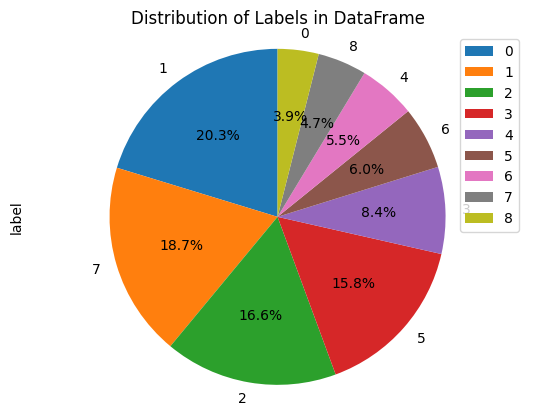

In [ ]:
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Labels in DataFrame')
plt.legend(df['label'].unique())
plt.show()

In [ ]:
df.head()

image_path label  \
0  /content/drive/MyDrive/Train/seborrheic kerato...     0   
1  /content/drive/MyDrive/Train/seborrheic kerato...     0   
2  /content/drive/MyDrive/Train/seborrheic kerato...     0   
3  /content/drive/MyDrive/Train/seborrheic kerato...     0   
4  /content/drive/MyDrive/Train/seborrheic kerato...     0   

                                               image  
0  [[[185, 165, 141], [187, 167, 144], [188, 167,...  
1  [[[141, 110, 97], [149, 118, 104], [157, 129, ...  
2  [[[147, 118, 107], [152, 129, 124], [157, 140,...  
3  [[[173, 164, 145], [173, 162, 144], [174, 161,...  
4  [[[53, 43, 46], [59, 49, 51], [69, 55, 57], [7...

In [ ]:
lass_counts = df['label'].value_counts().sort_index()


print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in label_map.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
0               seborrheic keratosis           93        
1               pigmented benign keratosis     478       
2               basal cell carcinoma           392       
3               squamous cell carcinoma        197       
4               actinic keratosis              130       
5               nevus                          373       
6               vascular lesion                142       
7               melanoma                       441       
8               dermatofibroma                 111       
------------------------------------------------------------
Total                                         2357      


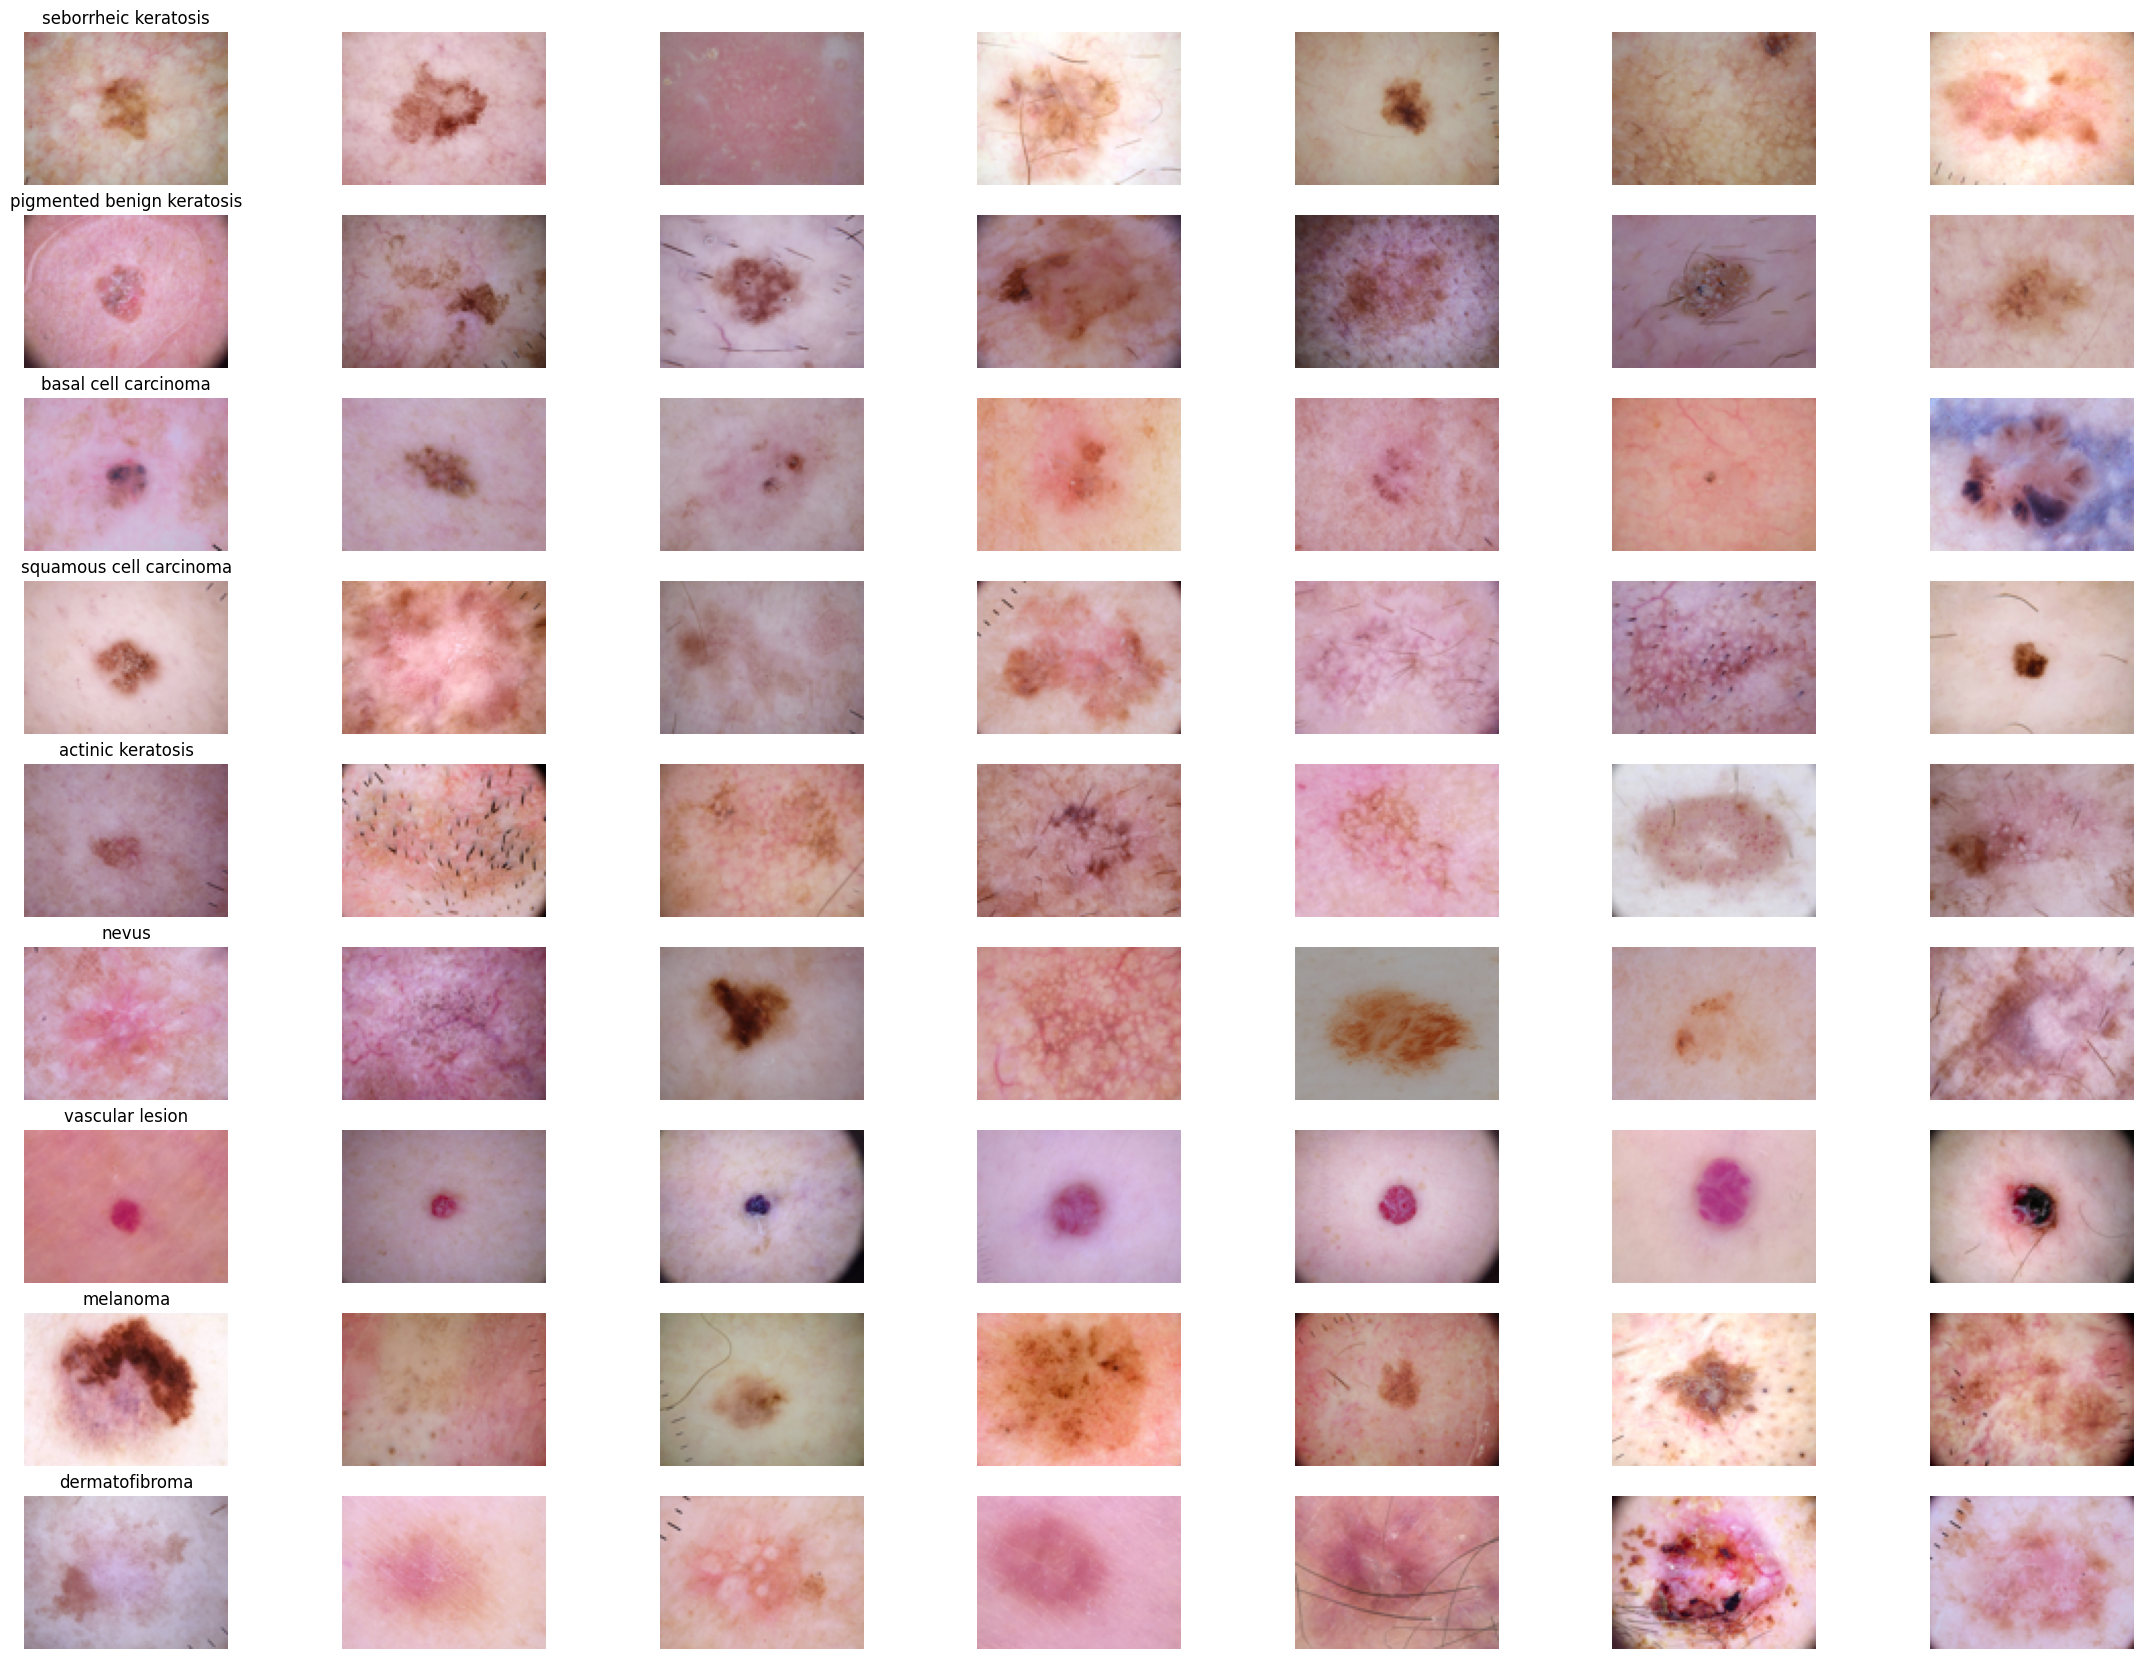

In [ ]:
n_samples = 7
fig, m_axs = plt.subplots(num_classes, n_samples, figsize=(4*n_samples, 3*7))
for n_axs, (class_idx, class_rows) in zip(m_axs, df.sort_values(['label']).groupby('label')):
    class_name = label_map[class_idx]
    n_axs[0].set_title(class_name)
    for c_ax, (_, c_row) in zip(n_axs, class_rows.sample(n_samples, random_state=5).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [ ]:
df['image'].map(lambda x: x.shape).value_counts()

(75, 100, 3)    2357
Name: image, dtype: int64

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:

augmented_df = pd.DataFrame(columns=['image_path', 'label', 'image'])


for class_label in df['label'].unique():

    image_arrays = df.loc[df['label'] == class_label, 'image'].values


    num_images_needed = max_images_per_class - len(image_arrays)


    if num_images_needed > 0:

        selected_images = np.random.choice(image_arrays, size=num_images_needed)


        for image_array in selected_images:

            image_tensor = np.expand_dims(image_array, axis=0)


            augmented_images = datagen.flow(image_tensor, batch_size=1)


            for i in range(augmented_images.n):
                augmented_image_array = augmented_images.next()[0].astype('uint8')
                augmented_df = augmented_df.append({'image_path': None, 'label': class_label, 'image': augmented_image_array}, ignore_index=True)

    # Add the original images for the current class to the augmented dataframe
    original_images_df = df.loc[df['label'] == class_label, ['image_path', 'label', 'image']]
    augmented_df = augmented_df.append(original_images_df, ignore_index=True)

# Group the augmented dataframe by the 'label' column and filter out extra images
df = augmented_df.groupby('label').head(max_images_per_class)

del augmented_df

# Use the augmented dataframe for further processing
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

Streaming output truncated to the last 5000 lines.
<ipython-input-21-e76c635506eb>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_df = augmented_df.append({'image_path': None, 'label': class_label, 'image': augmented_image_array}, ignore_index=True)
<ipython-input-21-e76c635506eb>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_df = augmented_df.append({'image_path': None, 'label': class_label, 'image': augmented_image_array}, ignore_index=True)
<ipython-input-21-e76c635506eb>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_df = augmented_df.append({'image_path': None, 'label': class_label, 'image': augmented_image_array}, ignore_index=True)
<ipython-input-21-e76c635506eb>:27: FutureWarn

In [ ]:
class_counts = df['label'].value_counts().sort_index()


print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in label_map.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
0               seborrheic keratosis           2500      
1               pigmented benign keratosis     2500      
2               basal cell carcinoma           2500      
3               squamous cell carcinoma        2500      
4               actinic keratosis              2500      
5               nevus                          2500      
6               vascular lesion                2500      
7               melanoma                       2500      
8               dermatofibroma                 2500      
------------------------------------------------------------
Total                                         22500     


In [ ]:
features = df.drop(columns=['label','image_path'],axis=1)
target = df['label']

In [ ]:
print(target.shape,features.shape)

(22500,) (22500, 1)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20,shuffle=True)

In [ ]:
x_train = np.asarray(x_train['image'].tolist())
x_test = np.asarray(x_test['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)
x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [ ]:
y_train = to_categorical(y_train,num_classes = num_classes)
y_test = to_categorical(y_test,num_classes = num_classes)

In [ ]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.20,shuffle=True)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], *(75, 100, 3))
x_test = x_test.reshape(x_test.shape[0], *(75, 100, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(75, 100, 3))

In [ ]:
y_train = y_train.astype(int)
y_validate = y_validate.astype(int)

In [ ]:
train_counts = np.sum(y_train, axis=0)
val_counts = np.sum(y_validate, axis=0)
test_counts = np.sum(y_test, axis=0)

print("Dataset Summary")
print("-" * 90)
print(f"{'Class Label':<15} {'Class Name':<30} {'Train':<10} {'Validation':<12} {'Test':<10} {'Total':<10}")
print("-" * 90)
for class_label, class_name in label_map.items():
    train_num = int(train_counts[class_label])
    val_num = int(val_counts[class_label])
    test_num = int(test_counts[class_label])
    total_num = train_num + val_num + test_num
    print(f"{class_label:<15} {class_name:<30} {train_num:<10} {val_num:<12} {test_num:<10} {total_num:<10}")
print("-" * 90)
print(f"{'Total':<46} {len(y_train):<10} {len(y_validate):<12} {len(y_test):<10} {len(y_train) + len(y_validate) + len(y_test):<10}")

Dataset Summary
------------------------------------------------------------------------------------------
Class Label     Class Name                     Train      Validation   Test       Total     
------------------------------------------------------------------------------------------
0               seborrheic keratosis           1607       391          502        2500      
1               pigmented benign keratosis     1618       396          486        2500      
2               basal cell carcinoma           1625       381          494        2500      
3               squamous cell carcinoma        1588       409          503        2500      
4               actinic keratosis              1640       383          477        2500      
5               nevus                          1580       411          509        2500      
6               vascular lesion                1595       410          495        2500      
7               melanoma                       1595       

In [ ]:
df.groupby('label').size()

label
0    2500
1    2500
2    2500
3    2500
4    2500
5    2500
6    2500
7    2500
8    2500
dtype: int64

In [ ]:
input_shape = df['image'][0].shape

In [ ]:
!pip install livelossplot
from livelossplot import PlotLossesKeras

In [ ]:
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [ ]:
model_DenseNet201 = DenseNet201(weights='imagenet', include_top=False, input_shape=input_shape)
model1 = Sequential()
for layer in model_DenseNet201.layers:
        layer.trainable = False
model1.add(model_DenseNet201)
model1.add(Flatten())
model1.add(Dropout(0.5))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(num_classes, activation='softmax'))
model1.summary()


74836368/74836368 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 2, 3, 1920)        18321984  
                                                                 
 flatten (Flatten)           (None, 11520)             0         
                                                                 
 dropout (Dropout)           (None, 11520)             0         
                                                                 
 dense (Dense)               (None, 64)                737344    
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                         

In [ ]:
from keras.optimizers import SGD
opt = SGD(learning_rate=0.0001, momentum=0.9)
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

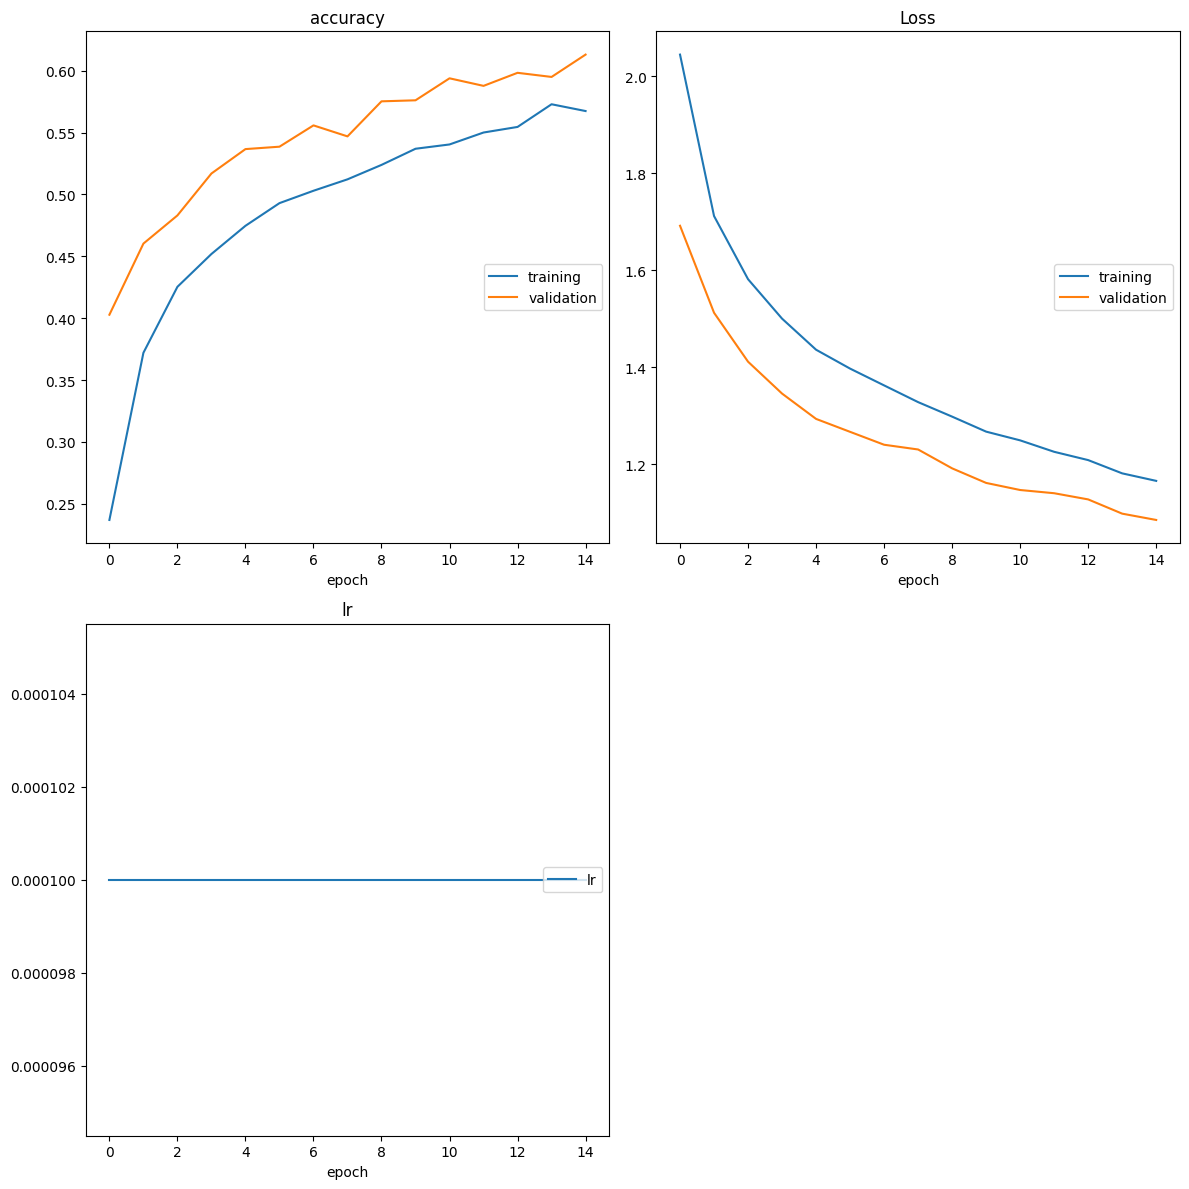

accuracy
	training         	 (min:    0.237, max:    0.573, cur:    0.567)
	validation       	 (min:    0.403, max:    0.613, cur:    0.613)
Loss
	training         	 (min:    1.166, max:    2.044, cur:    1.166)
	validation       	 (min:    1.085, max:    1.692, cur:    1.085)
lr
	lr               	 (min:    0.000, max:    0.000, cur:    0.000)
450/450 [==============================] - 611s 1s/step - loss: 1.1656 - accuracy: 0.5674 - val_loss: 1.0851 - val_accuracy: 0.6131 - lr: 1.0000e-04
Epoch 16/100
 31/450 [=>............................] - ETA: 7:03 - loss: 1.1225 - accuracy: 0.5897

In [ ]:
history = model1.fit(x=x_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.2,
                    batch_size=32,
                    validation_data=(x_validate,y_validate),
                    callbacks=[learning_rate_reduction, PlotLossesKeras()]
                   )